In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

## 线性回归

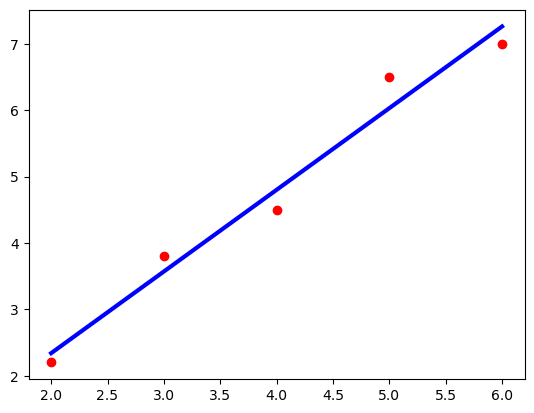

In [2]:
data_x=np.array([2,3,4,5,6]).reshape(-1, 1)
data_y=np.array([2.2,3.8,4.5,6.5,7.0]).reshape(-1, 1)

linear=LinearRegression()
linear.fit(data_x, data_y)

plt.scatter(data_x,data_y,c='r')
plt.plot(data_x, linear.predict(data_x), color='blue', linewidth=3)


In [3]:
print(u'系数',linear.coef_)
print(u'截距',linear.intercept_)

系数 [[1.23]]
截距 [-0.12]


## 决策树

In [4]:
from sklearn import datasets

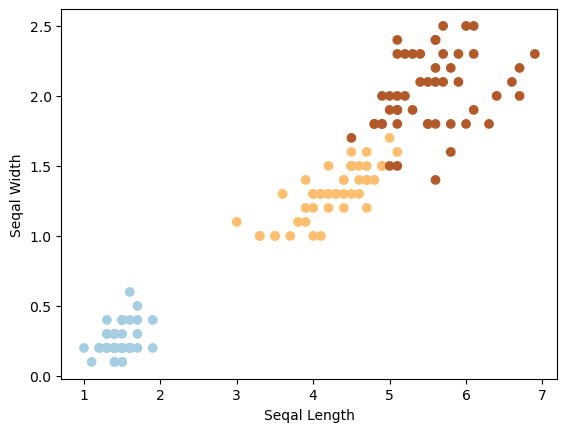

In [5]:
iris=datasets.load_iris()

X=iris.data[:,2:4]
y=iris.target

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Seqal Length')
plt.ylabel('Seqal Width')
plt.show()

### 切分数据集

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [25]:
#划分数据集
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#决策树分类器
clf=DecisionTreeClassifier()

#训练模型
clf.fit(x_train,y_train)
#预测
y_pred=clf.predict(x_test)
#评估模型

print('训练集准确率:%.2f%%' % (clf.score(x_train,y_train)*100))
print('测试集准确率:%.2f%%' % (clf.score(x_test,y_test)*100))

# #可视化决策树
# plt.figure(figsize=(20,10))
# tree.plot_tree(clf,filled=True)
# plt.show()

训练集准确率:99.17%
测试集准确率:100.00%


In [26]:
def plt_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0]-0.2,axis[1]+0.2,int((axis[1]-axis[0])*100)),
        np.linspace(axis[2]-0.2,axis[3]+0.2,int((axis[3]-axis[2])*100))
    )
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(x_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)

/var/folders/4n/s9lq2sbx5m18fjvq1r7w3hfr0000gn/T/ipykernel_25796/2739932615.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)


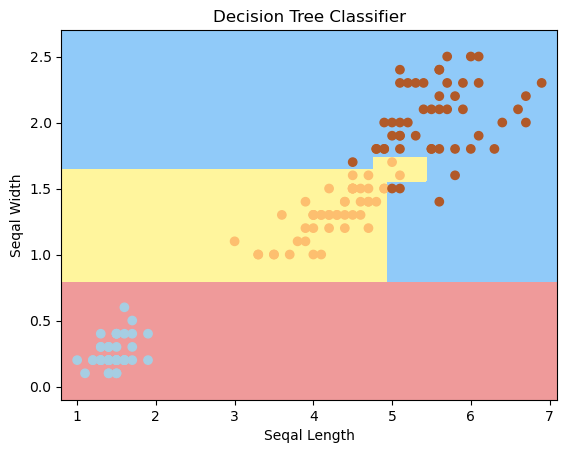

In [27]:
min_1,max_1=X[:,0].min(),X[:,0].max()
min_2,max_2=X[:,1].min(),X[:,1].max()

plt_boundary(clf,axis=[min_1,max_1,min_2,max_2])
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Seqal Length')
plt.ylabel('Seqal Width')
plt.title('Decision Tree Classifier')
plt.show()

In [ ]:
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [33]:
# boston=datasets.load_boston()
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
X,y=boston['data'],boston['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [34]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
#线性回归效果
LR=LinearRegression()
LR.fit(X_train,y_train)
print('线性回归训练集准确率%.2f%%' % (LR.score(X_train,y_train)*100))
print('线性回归测试集准确率%.2f%%' % (LR.score(X_test,y_test)*100))

#决策树回归效果
DT=DecisionTreeRegressor()
DT.fit(X_train,y_train)
print('决策树训练集准确率%.2f%%' % (DT.score(X_train,y_train)*100))
print('决策树测试集准确率%.2f%%' % (DT.score(X_test,y_test)*100))

#KNN回归效果
from sklearn.neighbors import KNeighborsRegressor
k=5
KNN=KNeighborsRegressor(k)
KNN.fit(X_train,y_train)
print('KNN训练集准确率%.2f%%' % (KNN.score(X_train,y_train)*100))
print('KNN测试集准确率%.2f%%' % (KNN.score(X_test,y_test)*100))

线性回归训练集准确率75.09%
线性回归测试集准确率66.88%
决策树训练集准确率100.00%
决策树测试集准确率68.96%
KNN训练集准确率84.99%
KNN测试集准确率71.90%


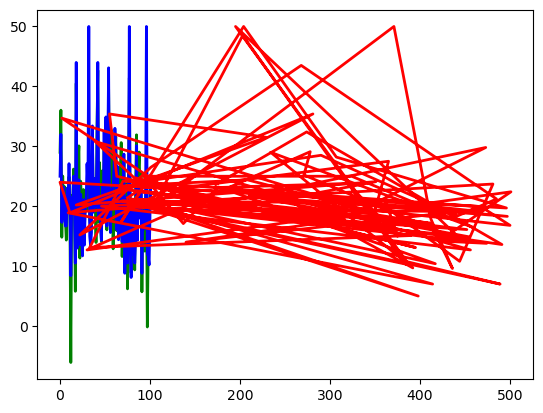

In [37]:
y_lr_pred=LR.predict(X_test)
y_dt_pred=DT.predict(X_test)
y_knn_pred=KNN.predict(X_test)

plt.plot(y_lr_pred, c='g', linewidth=2)
plt.plot(y_dt_pred, c='b', linewidth=2)
plt.plot(y_test, c='r', linewidth=2)
plt.show()